# Step 1. Import Libraries


In [1]:
import numpy as np
import pandas as pd

# Step 2. Load Dataset

In [2]:
jwellery = pd.read_csv("amazon_jwellery_Data.csv")
jwellery.head()

,Unnamed: 0,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment_jwlry
0,0,"""US""","""50423057""","""R135Q3VZ4DQN5N""","""B00JWXFDMG""","""657335467""","""Everbling Purple and Clear Briolette Drop Swa...","""Jewelry""",1,0,0,0 \t(N),1 \t(Y),"""Beauties!""","""so beautiful even tho clearly not high end .....",2015-08-31,positive
1,1,"""US""","""11262325""","""R2N0QQ6R4T7YRY""","""B00W5T1H9W""","""26030170""","""925 Sterling Silver Finish 6ct Simulated Diam...","""Jewelry""",1,0,0,0 \t(N),0 \t(N),"""Great product.""","""Great product.. I got this set for my mother,...",2015-08-31,positive
2,2,"""US""","""27541121""","""R3N5JE5Y4T6W5M""","""B00M2L6KFY""","""697845240""","""Sterling Silver Circle ""Friends Forever"" Infi...","""Jewelry""",1,0,0,0 \t(N),1 \t(Y),"""Exactly as pictured and my daughter's friend ...","""Exactly as pictured and my daughter's friend ...",2015-08-31,positive
3,3,"""US""","""5350721""","""R2I150CX5IVY9Q""","""B0006SW2WU""","""569859289""","""Surgical Stainless Steel Domed 9mm Fishbone R...","""Jewelry""",1,0,0,0 \t(N),1 \t(Y),"""Five Stars""","""Love it. Fits great. Super comfortable and ne...",2015-08-31,positive
4,4,"""US""","""24484424""","""R1RM9ICOOA9MQ3""","""B009YPDW70""","""332947422""","""Sterling Silver Family Pendant Necklace, 18""""","""Jewelry""",1,0,0,0 \t(N),1 \t(Y),"""... a Mother's Day gift for my Mom and she lo...","""Got this as a Mother's Day gift for my Mom an...",2015-08-31,positive


# Step 3. Data Exploration

In [3]:
jwellery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   market_place       100 non-null    object
 2   customer_id        100 non-null    object
 3   review_id          100 non-null    object
 4   product_id         100 non-null    object
 5   product_parent     100 non-null    object
 6   product_title      100 non-null    object
 7   product_category   100 non-null    object
 8   star_rating        100 non-null    int64 
 9   helpful_votes      100 non-null    int64 
 10  total_votes        100 non-null    int64 
 11  vine               100 non-null    object
 12  verified_purchase  100 non-null    object
 13  review_headline    100 non-null    object
 14  review_body        100 non-null    object
 15  review_date        100 non-null    object
 16  Sentiment_jwlry    100 non-null    object
dty

In [4]:
jwellery.describe()

,Unnamed: 0,star_rating,helpful_votes,total_votes
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.750000,0.740000,0.820000
std,29.011492,0.435194,2.468468,2.508088
min,0.000000,0.000000,0.000000,0.000000
25%,24.750000,0.750000,0.000000,0.000000
50%,49.500000,1.000000,0.000000,0.000000
75%,74.250000,1.000000,1.000000,1.000000
max,99.000000,1.000000,23.000000,23.000000


# Step 4. Handling Missing Values


In [5]:
jwellery.isnull().sum()

Unnamed: 0           0
market_place         0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
Sentiment_jwlry      0
dtype: int64

# Step 5. Correcting Inconsistent Formatting

# Droping columns which are not required

In [6]:
jwellery.drop(columns=['Unnamed: 0','market_place','review_id','product_id','vine','product_parent','review_headline','review_body',],inplace=True)

In [7]:
jwellery.head()

,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_jwlry
0,"""50423057""","""Everbling Purple and Clear Briolette Drop Swa...","""Jewelry""",1,0,0,1 \t(Y),2015-08-31,positive
1,"""11262325""","""925 Sterling Silver Finish 6ct Simulated Diam...","""Jewelry""",1,0,0,0 \t(N),2015-08-31,positive
2,"""27541121""","""Sterling Silver Circle ""Friends Forever"" Infi...","""Jewelry""",1,0,0,1 \t(Y),2015-08-31,positive
3,"""5350721""","""Surgical Stainless Steel Domed 9mm Fishbone R...","""Jewelry""",1,0,0,1 \t(Y),2015-08-31,positive
4,"""24484424""","""Sterling Silver Family Pendant Necklace, 18""""","""Jewelry""",1,0,0,1 \t(Y),2015-08-31,positive


# Date Formatting

In [8]:
def handle_quotation_marks(value):
    value=str(value)
    value=value.split('"')
    value=value[1]
    return value
jwellery['product_title']=jwellery['product_title'].apply(handle_quotation_marks)
jwellery["product_category"]=jwellery["product_category"].apply(handle_quotation_marks)
jwellery.head()

,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_jwlry
0,"""50423057""",Everbling Purple and Clear Briolette Drop Swar...,Jewelry,1,0,0,1 \t(Y),2015-08-31,positive
1,"""11262325""",925 Sterling Silver Finish 6ct Simulated Diamo...,Jewelry,1,0,0,0 \t(N),2015-08-31,positive
2,"""27541121""",Sterling Silver Circle,Jewelry,1,0,0,1 \t(Y),2015-08-31,positive
3,"""5350721""",Surgical Stainless Steel Domed 9mm Fishbone Ri...,Jewelry,1,0,0,1 \t(Y),2015-08-31,positive
4,"""24484424""","Sterling Silver Family Pendant Necklace, 18",Jewelry,1,0,0,1 \t(Y),2015-08-31,positive


In [9]:
def handle_verified_purchase(value):
    value=value[4]
    return value

jwellery['verified_purchase']=jwellery['verified_purchase'].apply(handle_verified_purchase)
jwellery.head()

,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_jwlry
0,"""50423057""",Everbling Purple and Clear Briolette Drop Swar...,Jewelry,1,0,0,Y,2015-08-31,positive
1,"""11262325""",925 Sterling Silver Finish 6ct Simulated Diamo...,Jewelry,1,0,0,N,2015-08-31,positive
2,"""27541121""",Sterling Silver Circle,Jewelry,1,0,0,Y,2015-08-31,positive
3,"""5350721""",Surgical Stainless Steel Domed 9mm Fishbone Ri...,Jewelry,1,0,0,Y,2015-08-31,positive
4,"""24484424""","Sterling Silver Family Pendant Necklace, 18",Jewelry,1,0,0,Y,2015-08-31,positive


In [10]:
jwellery.verified_purchase.value_counts()

verified_purchase
Y    97
N     3
Name: count, dtype: int64

# Step 6. Data Transformation

# Converting Data Types

In [11]:
from datetime import datetime


def handle_date(value):
    value= datetime.strptime(value, '%Y-%m-%d')
    
    return value

jwellery['review_date']=jwellery['review_date'].apply(handle_date)
jwellery.head()

,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_jwlry
0,"""50423057""",Everbling Purple and Clear Briolette Drop Swar...,Jewelry,1,0,0,Y,2015-08-31,positive
1,"""11262325""",925 Sterling Silver Finish 6ct Simulated Diamo...,Jewelry,1,0,0,N,2015-08-31,positive
2,"""27541121""",Sterling Silver Circle,Jewelry,1,0,0,Y,2015-08-31,positive
3,"""5350721""",Surgical Stainless Steel Domed 9mm Fishbone Ri...,Jewelry,1,0,0,Y,2015-08-31,positive
4,"""24484424""","Sterling Silver Family Pendant Necklace, 18",Jewelry,1,0,0,Y,2015-08-31,positive


In [12]:
jwellery.star_rating.value_counts()

star_rating
1    75
0    25
Name: count, dtype: int64

In [13]:
jwellery.helpful_votes.value_counts()

helpful_votes
0     70
1     17
2      7
5      2
3      2
4      1
23     1
Name: count, dtype: int64

In [14]:
jwellery.total_votes.value_counts()

total_votes
0     68
1     16
2      8
3      4
4      1
5      1
23     1
6      1
Name: count, dtype: int64

# Standardizing Categorical Values

In [15]:
jwellery['product_title'] = jwellery['product_title'].str.lower()
jwellery.head()

,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_jwlry
0,"""50423057""",everbling purple and clear briolette drop swar...,Jewelry,1,0,0,Y,2015-08-31,positive
1,"""11262325""",925 sterling silver finish 6ct simulated diamo...,Jewelry,1,0,0,N,2015-08-31,positive
2,"""27541121""",sterling silver circle,Jewelry,1,0,0,Y,2015-08-31,positive
3,"""5350721""",surgical stainless steel domed 9mm fishbone ri...,Jewelry,1,0,0,Y,2015-08-31,positive
4,"""24484424""","sterling silver family pendant necklace, 18",Jewelry,1,0,0,Y,2015-08-31,positive


# Step 7. Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verified_purchase', ylabel='count'>

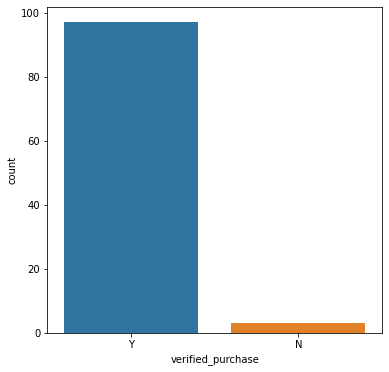

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(jwellery['verified_purchase'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment_jwlry', ylabel='count'>

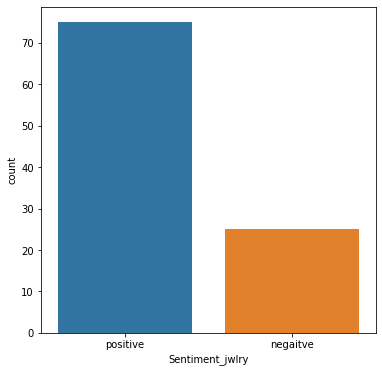

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(jwellery['Sentiment_jwlry'])

In [20]:
jwellery_1=jwellery.groupby(['verified_purchase'])['star_rating'].value_counts()
jwellery[(jwellery['star_rating']==1) & (jwellery['Sentiment_jwlry']=='negative')]

,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_jwlry


In [21]:
jwellery_1.to_frame()

count
verified_purchase star_rating       
N                 1                2
                  0                1
Y                 1               73
                  0               24

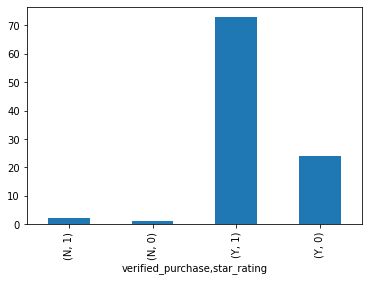

In [22]:
jwellery_1.plot(kind='bar')
plt.show()

# Step 8. Export the Cleaned Data

In [23]:
Cleaned_jwellery = jwellery.copy()
Cleaned_jwellery.to_csv('Cleaned_jwellery.csv', index=False)

In [24]:
df = pd.read_csv("cleaned_jwellery.csv")
df.head()

,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_jwlry
0,"""50423057""",everbling purple and clear briolette drop swar...,Jewelry,1,0,0,Y,2015-08-31,positive
1,"""11262325""",925 sterling silver finish 6ct simulated diamo...,Jewelry,1,0,0,N,2015-08-31,positive
2,"""27541121""",sterling silver circle,Jewelry,1,0,0,Y,2015-08-31,positive
3,"""5350721""",surgical stainless steel domed 9mm fishbone ri...,Jewelry,1,0,0,Y,2015-08-31,positive
4,"""24484424""","sterling silver family pendant necklace, 18",Jewelry,1,0,0,Y,2015-08-31,positive


# Data Quality Summary

#The dataset has been successfully cleaned and transformed.
#Missing values were handled through a combination of dropping rows and imputing values.
#Date formatting and standardization of categorical values were performed for consistency.
#Data types were converted to ensure appropriate data representation.
#Graphs has been successfully created.
#Cleaned data has been successfully saved in new csv file for future analysis.